In [1]:
import mogreps
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import scipy.stats as stats
from scipy import optimize

% pylab inline

mogreps_name = mogreps.make_data_object_name('mogreps-uk', 2013, 1, 1, 3, 0, 3)

Populating the interactive namespace from numpy and matplotlib


In [2]:
mogreps_name

'prods_op_mogreps-uk_20130101_03_00_003.nc'

In [8]:
mogreps_name = mogreps.make_data_object_name('mogreps-uk', 2013, 1, 1, 3, 0, 3)
mogreps.download_data('mogreps-uk', mogreps_name, data_folder=mogreps.Path('.'))

WindowsPath('prods_op_mogreps-uk_20130101_03_00_003.nc')

In [9]:
f = _

In [10]:
data_set = netCDF4.Dataset(f)

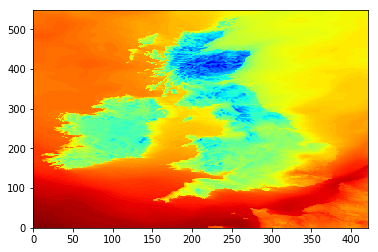

In [105]:
plt.pcolormesh(data_set.variables["air_temperature_2"][1], cmap=plt.get_cmap('jet'))

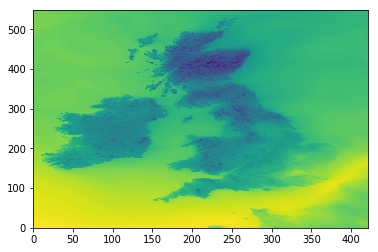

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.pcolormesh(data_set['air_temperature_2'][0])

In [45]:
rotation = data_set['rotated_latitude_longitude']
transform = ccrs.RotatedPole(pole_longitude=rotation.grid_north_pole_longitude, pole_latitude=rotation.grid_north_pole_latitude)
projection = ccrs.NearsidePerspective()

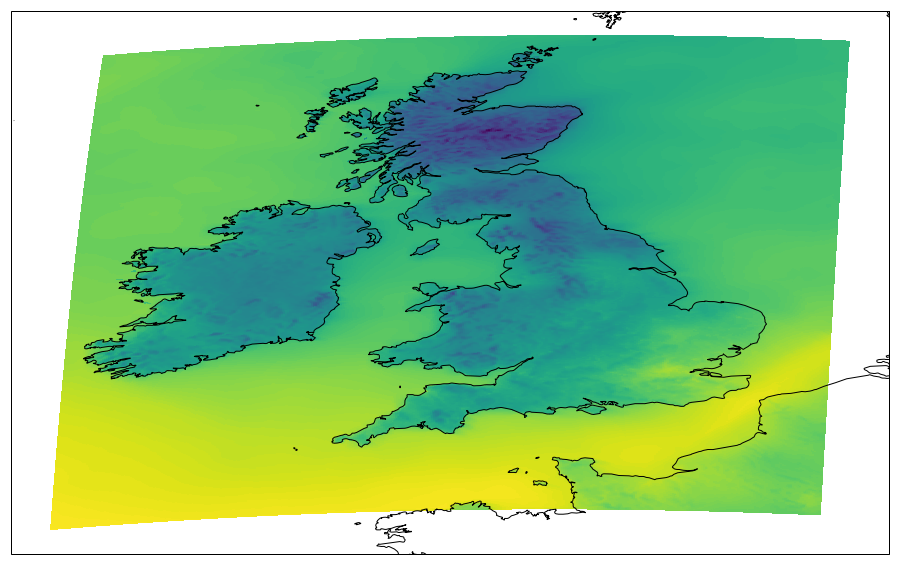

In [46]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection=projection)
pcm = ax.pcolormesh(data_set['grid_longitude'], data_set['grid_latitude'], data_set['air_temperature_2'][0], transform=transform)
ax.coastlines(resolution='10m')

In [56]:
random.seed(999)

In [57]:
random.uniform()

0.8034280400796879

In [58]:
[np.random.uniform(0, 10) for x in range(6)]

[5.275222956826448,
 1.1911146502821202,
 6.396814442423551,
 0.9092526277407997,
 3.322256807930123,
 4.273809474413368]

In [64]:
gaussian = stats.norm(loc=4.0, scale=1.0)

In [65]:
x=np.linspace(0.0, 8.0, 100)

In [68]:
y = gaussian.pdf(x)
z = gaussian.cdf(x)

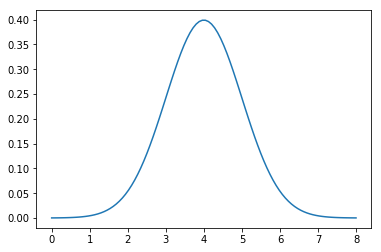

In [67]:
plt.plot(x, y)

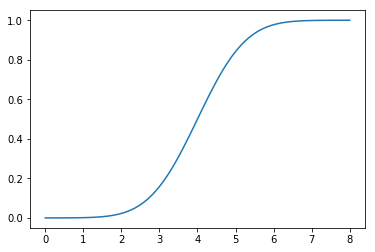

In [69]:
plt.plot(x, z)

In [70]:
x1 = gaussian.rvs(1000)

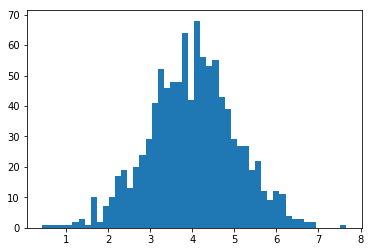

In [72]:
plt.hist(x1, bins=50);

In [74]:
x3 = np.linspace(-5, 5, 50)
y3 = 2.9 * sin(1.5 * x3) + random.normal(size=50)

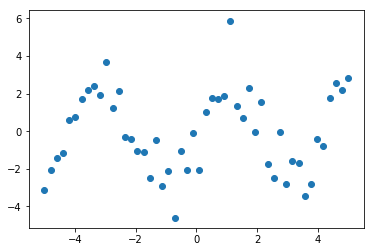

In [75]:
plt.scatter(x3, y3)

In [81]:
def test_func(x, a, b):
    return a * sin(b*x)

In [82]:
params, params_covariance = optimize.curve_fit(test_func, x3, y3, p0=[2, 2])

In [83]:
params

array([2.66369258, 1.4921888 ])

In [84]:
params_covariance

array([[ 0.04876257, -0.00061512],
       [-0.00061512,  0.0007181 ]])

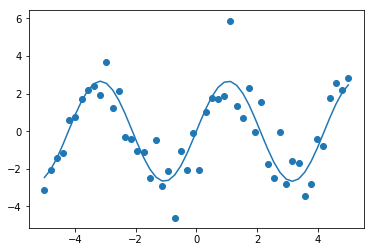

In [86]:
plt.scatter(x3, y3, label="data")
plt.plot(x3, test_func(x3, params[0], params[1]))

In [88]:
norm = stats.norm
samp = norm.rvs(loc=0, size=500)
param = norm.fit(samp)

In [93]:
x4 = np.linspace(-5, 5, 100)
pdf_fitted = norm.pdf(x4, loc=param[0], scale=param[1])
pdf = norm.pdf(x4)

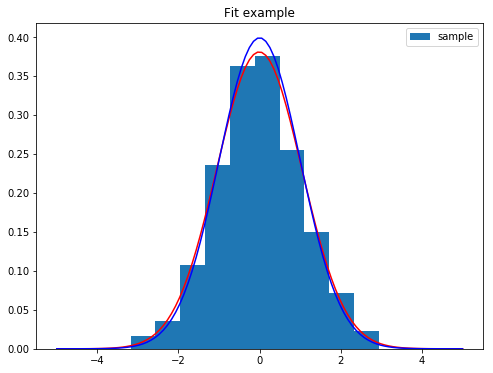

In [104]:
plt.figure(figsize=(8, 6))
plt.title('Fit example')
plt.plot(x4, pdf_fitted, 'r-')
plt.plot(x4, pdf, 'b-')
plt.hist(samp, density=True, label='sample')
plt.legend(loc='best')

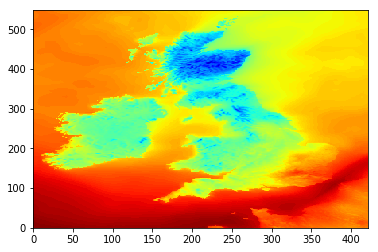

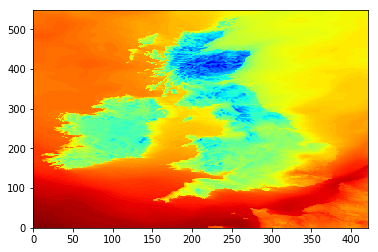

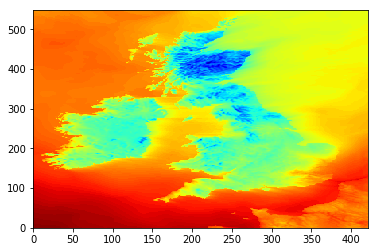

IndexError: index exceeds dimension bounds

In [111]:
#fig, axs = plt.subplots(1, 10)
for i in range(10):
    plt.pcolormesh(data_set.variables["air_temperature_2"][i], cmap=plt.get_cmap('jet'))
    plt.show()

In [117]:
data_set.variables["air_temperature_2"]

<class 'netCDF4._netCDF4.Variable'>
float32 air_temperature_2(time_3, grid_latitude, grid_longitude)
    _FillValue: -1073741800.0
    standard_name: air_temperature
    units: K
    um_stash_source: m01s03i236
    cell_methods: time_3: minimum (interval: 1 hour)
    grid_mapping: rotated_latitude_longitude
    coordinates: forecast_period_3 forecast_reference_time height
unlimited dimensions: time_3
current shape = (3, 548, 421)
filling on

In [123]:
import pprint

In [124]:
pprint.pprint(data_set.variables.keys())

odict_keys(['wet_bulb_potential_temperature', 'rotated_latitude_longitude', 'time', 'pressure', 'grid_latitude', 'grid_longitude', 'forecast_period', 'forecast_reference_time', 'cloud_base_altitude_assuming_only_consider_cloud_area_fraction_greater_than_2p5_oktas', 'time_0', 'forecast_period_0', 'cloud_area_fraction_assuming_maximum_random_overlap', 'stratiform_snowfall_rate', 'time_1', 'forecast_period_1', 'wet_bulb_freezing_level_altitude', 'time_2', 'forecast_period_2', 'air_pressure_at_sea_level', 'air_temperature', 'pressure_0', 'air_temperature_0', 'height', 'air_temperature_1', 'time_3', 'time_3_bnds', 'forecast_period_3', 'forecast_period_3_bnds', 'air_temperature_2', 'dew_point_temperature', 'fog_area_fraction', 'geopotential_height', 'pressure_1', 'high_type_cloud_area_fraction', 'low_type_cloud_area_fraction', 'medium_type_cloud_area_fraction', 'relative_humidity', 'relative_humidity_0', 'specific_humidity', 'stratiform_rainfall_amount', 'forecast_period_4', 'forecast_period